# Assignment 4

In this assignment, we are supposed to apply the XOR problem of MLP to a letter recognition task. In addition to that, we also need to test our model on noisy data and determine the extent of noise our model can accept. The data in the _pattern1.txt_ file comprise of 312 rows and 13 columns. Each letter is represented as a 12x13 matrix in the alphabetical order.  

### Task 1

In this task, we  will implement the multi-layer percepton (MLP) and will train the model on the dataset of alphabets given in the file _pattern1.txt_ . The output of the alogorithm will be the ASCII representation of the charcters. 
In order to implement this, the 12x13 matrix for each charcter is flattened into an array of 156 elements resulting in a 26x156 shape trainibg matrix. Corresponding to that, an output matrix of shape 26x7 which comprise of ASCII values of the characters is used. The results are visualized through plotting the error.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import the daata and prepare it for training
X_patt1 = pd.read_csv("pattern1.txt", sep=" ", header=None)
X_patt1 = np.array(X_patt1)
X = np.array(np.split(X_patt1, 26))          # separatting all the characters
X = X.reshape(26, 156)                       # flattening the characters
X = np.column_stack([X, np.ones(26)])        # adding the threshold column

Y = np.array([list('{0:07b}'.format(65))])   # creating array of ASCII values of characters
for i in range(ord("B"), ord("Z")+1):
    Y = np.vstack((Y, list('{0:07b}'.format(i))))
Y = Y.astype(float)


def MLP(X, Y, Ntrials, Nh=26):    # X = trainig set, y = trainig labels, Ntrials = no. of iterations, Nh = no. of hidden nodes
    # model specs
    Ni = 157
    No = 7
    # Parameter and array initialization
    wh = np.random.randn(Nh, Ni)
    d_wh = np.zeros(wh.shape)
    wo = np.random.randn(No, Nh)
    d_wo = np.zeros(wo.shape)

    error = np.array([])

    for trial in range(Ntrials):
        h = 1/(1+np.exp(-np.dot(wh, X.T)))        # hidden activation for all patterns
        y = 1/(1+np.exp(-np.dot(wo, h)))          # output for all patterns

        delta_output = y*(1-y)*(Y-y.T).T
        delta_hidden = h*(1-h)*(np.dot(wo.T, delta_output))  # delta backprop

        # updating weights and computing error
        d_wo = 0.9*d_wo + np.dot(delta_output, h.T)
        wo = wo + 0.1*d_wo

        d_wh = 0.9*d_wh + np.dot(delta_hidden, X)
        wh = wh + 0.1*d_wh

        error = np.append(error, np.sum(np.abs(Y-y.T)))
    return error, wh, wo


error, wh, wo = MLP(X, Y, 1000)                # trainig the model and returning final weights and error

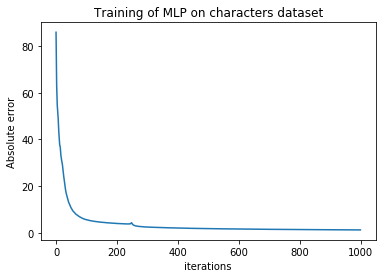

The error was reduced up to :  1.2954478142450272


In [2]:
# Plot the results
plt.plot(error)
plt.xlabel("iterations")
plt.ylabel("Absolute error")
plt.title("Training of MLP on characters dataset")
plt.show()
print("The error was reduced up to : ",error[-1])

The Absolute error while training was significantly reduced in the intial iterations while continues to fall in small amounts till the final iteration. Since the absolute error is reduced to less than 1 for this perticular problem, it can be deduced that the algorithm was successful in learning this perticular problem.

### Task 2

In this task, we will test our model created in task 1 against noisy patterns and will determine the limit upto which our model can accept the noise and predict the characters correctly. 
For adding the noise, we are randomly selecting rows and columns form the characters dataset and flipping at that perticular position. The noise is added to according to a percentage, i.e. if one wants to add 10% noise in the dataset, a total of 225 bits will be flipped in the dataset. (0's will be converted to 1's and vice-versa)

In [3]:
def add_noise(X, noise_percent):
    np.random.seed(10)
    x_noisy = np.copy(X)
    # add noisy examples in training set
    noise_points = int(156 * (noise_percent / 100))
    for i in np.random.choice(156, noise_points):
        for j in np.random.choice(26, noise_points):
            if x_noisy[j][i] == 0:
                x_noisy[j][i] = 1
            else:
                x_noisy[j][i] = 0
    return x_noisy

# predict
def predict(X_test, wh, wo):
    h_t = 1 / (1 + np.exp(-np.dot(wh, X_test.T)))  # hidden activation fro all patterns
    y_t = 1 / (1 + np.exp(-np.dot(wo, h_t)))

    y_t[y_t > 0.5] = 1
    y_t[y_t < 0.5] = 0
    y_t = y_t.astype(int).astype(str)
    y_t = y_t.T
    predicted = np.array([])
    for i in y_t:
        predicted = np.append(predicted, chr(int("".join(i), 2)))
    return predicted

# add the noise (10%)
X_noisy = add_noise(X, noise_percent=10)

# making predictions and calculating accuarcy
predicted = predict(X_noisy, wh, wo)             # weights from training
true_labels = np.array([list("ABCDEFGHIJKLMNOPQRSTUVWXYZ")])        # true labels
correct_predictions = np.count_nonzero(predicted == true_labels)
accuracy = (correct_predictions/26)*100
print("accuracy after adding 10% noise : ", accuracy, "%")
print(correct_predictions,"characters correctly predicted out of 26")

accuracy after adding 10% noise :  84.61538461538461 %
22 characters correctly predicted out of 26


In [4]:
# add the noise (5%)
X_noisy = add_noise(X, noise_percent=5)

# making predictions and calculating accuarcy
predicted = predict(X_noisy, wh, wo)             # weights from training
correct_predictions = np.count_nonzero(predicted == true_labels)
accuracy = (correct_predictions/26)*100
print("accuracy after adding 5% noise : ", accuracy,"%")
print(correct_predictions, "characters correctly predicted out of 26")


accuracy after adding 5% noise :  100.0 %
26 characters correctly predicted out of 26


In [5]:
# add the noise (20%)
X_noisy = add_noise(X, noise_percent=20)

# making predictions and calculating accuarcy
predicted = predict(X_noisy, wh, wo)             # weights from training
correct_predictions = np.count_nonzero(predicted == true_labels)
accuracy = (correct_predictions/26)*100
print("accuracy after adding 20% noise : ", accuracy, "%")
print(correct_predictions, "characters correctly predicted out of 26")

accuracy after adding 20% noise :  65.38461538461539 %
17 characters correctly predicted out of 26


As expected, the algorithm works prettry well if the noise precent is low and tends to faulter when noise is increased. when only 5% noise is added, the algorithm predicts all the characters correctly most of the time. While when the noise is 10%, the accuracy drops to ~90% and dropping of accuracy continues as noise is increased. 
This perticular configuration of the MLP algorithm is tolerent up to 5-10% of noise. The characters that have a simple geometry (like "C") can tolertate more noise that the characters with difficult geometry (like "B")

### Task 3

In this task, we are supposed to make prediction about the charatcter in the _pattern2.txt_ file. This file contains a noisy implementation of an character (currently unknown). we need to identily what the character is.
First of all we will train our model on pure as well as noisy data to get better predictions of the noisy pattern 2.
we will then run the training and prediction 20 times to get the most frequent character in the predictions. The most frequent character is most likely to be the correct answer.

In [7]:
X_copy = np.copy(X)
X_copy = add_noise(X_copy, noise_percent=30)
X_noisy = np.vstack((X, X_copy))
X_copy = np.copy(X)
X_copy = add_noise(X_copy, noise_percent=60)
X_noisy = np.vstack((X_noisy, X_copy))
Y_train = np.vstack((Y,Y))
Y_train = np.vstack((Y_train, Y))

# loading pattern 2
X_patt2 = pd.read_csv("pattern2.txt", sep=" ", header=None)
X_patt2 = X_patt2.dropna("columns")
X_patt2.columns = np.arange(13)
X_patt2 = np.array(X_patt2)
X_test = np.append(X_patt2.reshape((1, 156)), 1)

def predict_single(X_test, wh, wo):
    h_t = 1 / (1 + np.exp(-np.dot(wh, X_test)))  # hidden activation f0r all patterns
    y_t = 1 / (1 + np.exp(-np.dot(wo, h_t)))

    y_t[y_t > 0.5] = 1
    y_t[y_t < 0.5] = 0
    y_t = y_t.astype(int).astype(str)
    predicted = chr(int("".join(y_t), 2))
    return predicted

# making predictions
patt2 = np.array([])
for i in range(20):
    error, wh, wo = MLP(X_noisy, Y_train, 1000, Nh=100)
    patt2 = np.append(patt2, predict_single(X_test, wh, wo))
print("character 'K' has occured", np.count_nonzero(patt2[patt2=="K"]), "times in 20 iterations")

character 'K' has occured 7 times in 20 iterations


According to my model's predictions, the pattern 2 is the letter "K".

### Task 4

In this task, we need to evaluate our model's performance while training on noisy patterns. In addition to that, we will also find out if the performance of the model will be affected by number of nodes in the hidden layer.

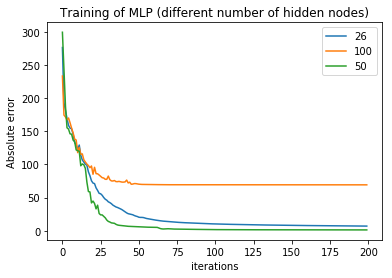

In [8]:
X_copy = np.copy(X)
X_copy = add_noise(X_copy, noise_percent=10)
X_noisy = np.vstack((X, X_copy))
X_copy = np.copy(X)
X_copy = add_noise(X_copy, noise_percent=20)
X_noisy = np.vstack((X_noisy, X_copy))
Y_train = np.vstack((Y,Y))
Y_train = np.vstack((Y_train, Y))
error, wh, wo = MLP(X_noisy, Y_train, 200)
# Plot the results
plt.plot(error, label="26")
plt.xlabel("iterations")
plt.ylabel("Absolute error")
plt.title("Training of MLP (different number of hidden nodes)")
error, wh, wo = MLP(X_noisy, Y_train, 200, Nh=100)
plt.plot(error, label="100")
error, wh, wo = MLP(X_noisy, Y_train, 200, Nh=50)
plt.plot(error, label="50")
plt.legend()
plt.show()

Upon trainingg the model on noisy data, where the training dataset contains examples of pure, 10% noise and 20% noise, the error of the training phase tends to rise as we increase the number of hidden nodes more than 50. TIt can be said that the optimum number of nodes in the hidden layer for this problem is 50. The error does not minimize well if we increase the number of nodes.
More plots can be drawn to verify this.

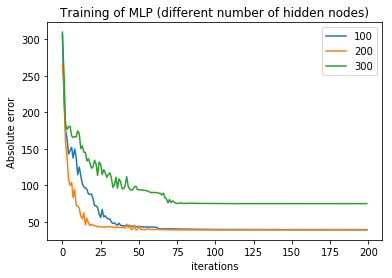

In [14]:
X_copy = np.copy(X)
X_copy = add_noise(X_copy, noise_percent=10)
X_noisy = np.vstack((X, X_copy))
X_copy = np.copy(X)
X_copy = add_noise(X_copy, noise_percent=20)
X_noisy = np.vstack((X_noisy, X_copy))
Y_train = np.vstack((Y,Y))
Y_train = np.vstack((Y_train, Y))

error, wh, wo = MLP(X_noisy, Y_train, 200, Nh=100)
plt.plot(error, label="100")
plt.xlabel("iterations")
plt.ylabel("Absolute error")
plt.title("Training of MLP (different number of hidden nodes)")
error, wh, wo = MLP(X_noisy, Y_train, 200, Nh=200)
plt.plot(error, label="200")
error, wh, wo = MLP(X_noisy, Y_train, 200, Nh=300)
plt.plot(error, label="300")
plt.legend()
plt.show()

Now We will check the accuracy of the trained model (on a mixture of pure and noisy examples) on noisy data.

In [15]:
# making predictions and calculating accuarcy
error, wh, wo = MLP(X_noisy, Y_train, 1000, Nh=50)
X_noisy_test = add_noise(X, noise_percent=20)
predicted = predict(X_noisy_test, wh, wo)             # weights from training
correct_predictions = np.count_nonzero(predicted == true_labels)
accuracy = (correct_predictions/26)*100
print("--Results when trained on noisy patterns and number of hidden nodes 50--")
print("accuracy after adding 20% noise : ", accuracy, "%")
print(correct_predictions, "characters correctly predicted out of 26")

--Results when trained on noisy patterns and number of hidden nodes 50--
accuracy after adding 20% noise :  100.0 %
26 characters correctly predicted out of 26


The model works pretty well on noisy data when keeping the number of hidden nodes as 50. Compared to the model's accuacy when trained on only pure examples, which was ~76% keeping the noise same, it works better. 

In [11]:
# making predictions and calculating accuarcy
error, wh, wo = MLP(X_noisy, Y_train, 1000, Nh=26)
X_noisy_test = add_noise(X, noise_percent=20)
predicted = predict(X_noisy_test, wh, wo)             # weights from training
correct_predictions = np.count_nonzero(predicted == true_labels)
accuracy = (correct_predictions/26)*100
print("--Results when trained on noisy patterns and number of hidden nodes 26--")
print("accuracy after adding 20% noise : ", accuracy, "%")
print(correct_predictions, "characters correctly predicted out of 26")

--Results when trained on noisy patterns and number of hidden nodes 26--
accuracy after adding 20% noise :  100.0 %
26 characters correctly predicted out of 26


Even on reducing the number of hidden nodes to initial 26, the accuracy remains constantly high. While increasing the number of hidden nodes from 50 up till 100,  will encounter a drastic change shown below.

In [12]:
# making predictions and calculating accuarcy
error, wh, wo = MLP(X_noisy, Y_train, 1000, Nh=100)
X_noisy_test = add_noise(X, noise_percent=20)
predicted = predict(X_noisy_test, wh, wo)             # weights from training
correct_predictions = np.count_nonzero(predicted == true_labels)
accuracy = (correct_predictions/26)*100
print("--Results when trained on noisy patterns and number of hidden nodes 100--")
print("accuracy after adding 20% noise : ", accuracy, "%")
print(correct_predictions, "characters correctly predicted out of 26")

--Results when trained on noisy patterns and number of hidden nodes 100--
accuracy after adding 20% noise :  50.0 %
13 characters correctly predicted out of 26


We can see accuracy drop when training the model on 100 hidden layer nodes. this can be accunted to the partial learning of the model due to excessively large number of hidden layer nodes.